 # Final Project 2 : Logistic Regression dan SVM

- Celin Manongko - PYTN-KS10-018
- Alina Florencia Karuniawati - PYTN-KS10-001
- Nine Alvariqati Varqa Ansori - PYTN-KS10-010

# Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium import Marker

from statsmodels.stats.diagnostic import normal_ad
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Data Loading

In [2]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


**Data overview: <br>**
- Date - tanggal pada hari itu <br>
- Location - lokasi, nama kota di Australia<br>
- MinTemp - temperatur terendah hari itu dalam satuan celcius<br>
- MaxTemp - temperatur tertinggi pada hari itu dalam satuan celcius<br>
- Rainfall - jumlah curah hujan hari itu dalam satuan mm<br>
- Evaporation - jumlah evaporasi dalam satuan mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu<br>
- Sunshine - jumlah jam hari itu cerah dengan cahaya matahari<br>
- WindGustDir - arah kecepatan angin yang paling tinggi selaama 24 jam sebelum jam 12 malam hari itu <br>
- WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu <br>
- WinDir9am - arah angin jam 9 pagi<br>
- WinDir3pm - arah angin jam 3 sore<br>
- WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 9 pagi<br>
- WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore<br>
- Humidity9am - humiditas jam 9 pagi dalam persen<br>
- Humidity3pm - humiditas jam 3 sore dalam persen<br>
- Pressure9am - tekanan udara jam 9 pagi dalam hpa<br>
- Pressure3pm - tekanan udara jam 3 sore dalam hpa<br>
- Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam satuan oktas, unit seperdelapan, menghitung berapa unit seperdelapan dari langit yang tertutup awan. Jika 0 langit cerah, jika 8 langit sepenuhnya tertutup awan<br>
- Cloud3pm - persentase langit yang tertutup awan jam 3 sore<br>
- Temp9am - temperatur jam 9 pagi dalam celcius<br>
- Temp3pm - temperatur jam 3 sore dalam celcius<br>
- RainToday - apakah hari ini hujan<br>
- RainTomorrow - apakah hari esok akan hujan (variable yg mau diprediksi)<br>

# Background Analysis

Prediksi cuaca dibutuhkan untuk mendapatkan informasi perkiraan cuaca, karena banyak orang yang melakukan aktivitas di luar ruangan. Prediksi cuaca dapat dilakukan dengan melakukan pengamatan cuaca, tekanan udara, suhu, kelembaban, kecepatan angin, arah angin, curah hujan, cahaya matahari, dan pergerakan awan. Dalam penelitian ini kami melakukan prediksi hujan menggunakan dataset yang berisi sekitar 10 tahun (2007-2017) pengamatan cuaca harian dari berbagai stasiun cuaca di Australia.

# Data Shape

In [3]:
df.shape

(145460, 23)

Data ini terdiri dari 23 kolom dan 145.460 baris

# Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Berdasarkan pengecekan di atas terdapat tipe data yang belum sesuai, yaitu untuk kolom Date (belum berupa datetime)

# Change Data Type

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Dapat dilihat bahwa kolom Date tipe datanya telah berhasil diubah menjadi datetime

# Check Duplicated Data

In [7]:
df.duplicated().sum()

0

Berdasarkan pengecekan di atas tidak ada data yang duplikat

# Data Cleaning

## Check Missing Values

In [8]:
for col in df:
    print("Nilai unik dalam kolom: ", col.upper())
    print(df[col].unique())

Nilai unik dalam kolom:  DATE
['2008-12-01T00:00:00.000000000' '2008-12-02T00:00:00.000000000'
 '2008-12-03T00:00:00.000000000' ... '2008-01-29T00:00:00.000000000'
 '2008-01-30T00:00:00.000000000' '2008-01-31T00:00:00.000000000']
Nilai unik dalam kolom:  LOCATION
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Nilai unik dalam kolom:  MINTEMP
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 

Dari pengecekan di atas dapat dilihat bahwa hampir seluruh kolom memiliki missing values kecuali kolom Date dan Location. Oleh karena itu selanjutnya kita akan melihat jumlah dari missing values pada tiap-tiap kolom

In [9]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
df.isnull().sum() *100 / len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Dari pengecekan di atas dapat dilihat bahwa missing value terbanyak terdapat pada kolom evaporation, sunshine, dan cloud3pm. Oleh karena itu, kami tidak akan membuang secara langsung missing value tersebut melainkan mengisi missing value tersebut dengan median untuk data numerical dan untuk data string kami mengisi missing value dengan menggunakan modus.

## Handling Missing Values

In [11]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].median())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].median())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].median())

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [12]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Dapat dilihat bahwa missing value telah berhasil diatasi.

# EDA

Pertama-tama kita akan mengambil tanggal, tahun, dan bulan dari kolom datetime untuk keperluan analisis

In [13]:
df['year'] = pd.to_datetime(df.Date).dt.year
df['month'] = pd.to_datetime(df.Date).dt.month
df['day'] = pd.to_datetime(df.Date).dt.day

## Pie Chart

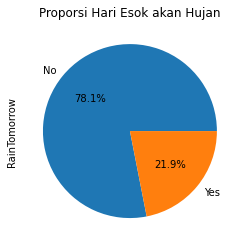

In [14]:
df.RainTomorrow.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Proporsi Hari Esok akan Hujan')
plt.show()

Berdasarkan pie chart di atas, dari tahun 2007 hingga tahun 2017 proporsi untuk hari esok tidak akan hujan lebih tinggi daripada hari esok akan hujan.

## Scatter Plot

### Rainfall

In [15]:
df1gr = df[['Rainfall','year']].groupby(['year'], as_index=False).agg({'Rainfall':'mean'})

In [16]:
df1gr

,year,Rainfall
0,2007,3.219672
1,2008,2.268282
2,2009,2.141223
3,2010,2.652771
4,2011,2.777413
5,2012,2.358810
6,2013,2.228657
7,2014,1.912798
8,2015,2.081862
9,2016,2.327557


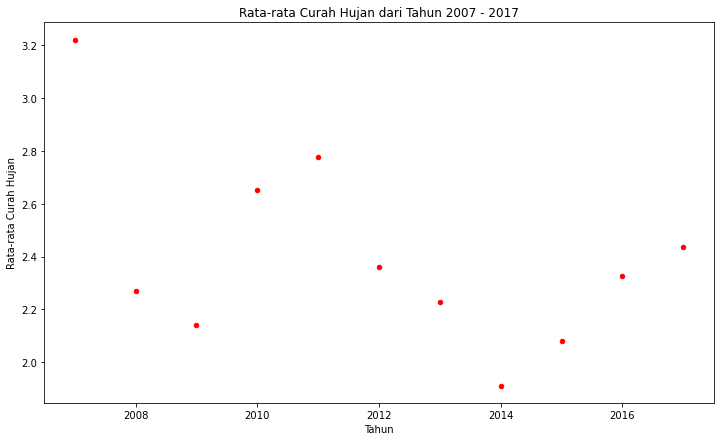

In [17]:
df1gr.plot(kind='scatter', 
                x='year', 
                y='Rainfall', 
                figsize=(12,7),
                color='red')
plt.title("Rata-rata Curah Hujan dari Tahun 2007 - 2017")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Curah Hujan")
plt.show()

Rata-rata curah hujan di Australia dari tahun 2007 hingga 2017 paling tinggi ada di tahun 2007. Sementara itu, rata-rata curah hujan terendah ada pada tahun 2014.

## Line Plot

### Sunshine

In [18]:
df2gr = df[['Sunshine','month']].groupby(['month'], as_index=False).agg({'Sunshine':'mean'})

In [19]:
df2gr

,month,Sunshine
0,1,8.822892
1,2,8.500630
2,3,7.990682
3,4,7.721056
4,5,7.370164
5,6,7.018228
6,7,7.151501
7,8,7.737903
8,9,8.024476
9,10,8.447714


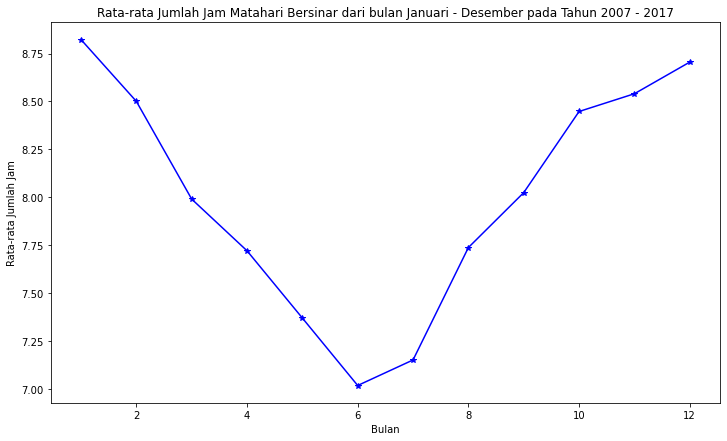

In [20]:
df2gr.plot(kind='line', 
                x='month', 
                y='Sunshine', 
                figsize=(12,7),
                color='blue',
                legend = False,
                marker="*")
plt.title("Rata-rata Jumlah Jam Matahari Bersinar dari bulan Januari - Desember pada Tahun 2007 - 2017")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Jam")
plt.show()

Dari tahun 2007 hingga 2017, rata-rata jumlah jam matahari bersinar paling lama ada pada bulan Januari, Februari, dan Desember. Hal ini dikarenakan pada bulan Desember hingga Februari Australia memasuki musim panas. Sedangkan pada bulan Juni hingga Juli merupakan rata-rata jumlah jam matahari bersinar yang paling cepat karena pada dua bulan ini Australia sedang mengalami musim dingin.

## Distribution Plot (DistPlot)

### Wind Speed

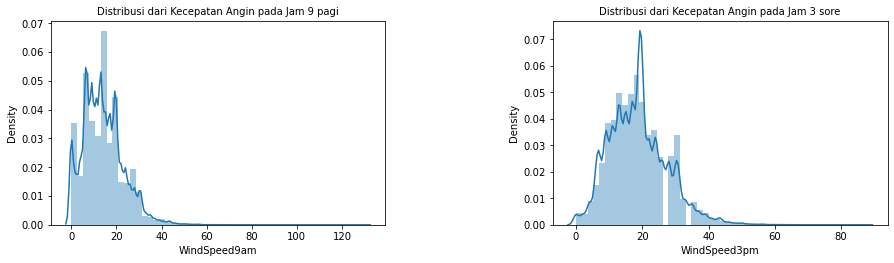

In [21]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(3,2,1)
sns.distplot(df['WindSpeed9am'])
ax.set_title("Distribusi dari Kecepatan Angin pada Jam 9 pagi", fontsize=10)

ax = fig.add_subplot(3,2,2)
sns.distplot(df['WindSpeed3pm'])
ax.set_title("Distribusi dari Kecepatan Angin pada Jam 3 sore", fontsize=10)

plt.show()

$H_0$ : **`Kecepatan angin pada jam 9 pagi berdistribusi normal`** <br>
$H_1$ : **`Kecepatan angin pada jam 9 pagi tidak berdistribusi normal`** <br>

$H_0$ : **`Kecepatan angin pada jam 3 sore berdistribusi normal`** <br>
$H_1$ : **`Kecepatan angin pada jam 3 sore tidak berdistribusi normal`** <br>

In [22]:
p_value = normal_ad(df['WindSpeed3pm'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

if p_value < 0.05:
    print('Null hypothesis ditolak dan kecepatan angin pada jam 3 sore tidak berdistribusi normal')
else:
    print('Null hypothesis tidak ditolak dan kecepatan angin pada jam 3 sore berdistribusi normal')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0
Null hypothesis ditolak dan kecepatan angin pada jam 3 sore tidak berdistribusi normal


In [23]:
p_value = normal_ad(df['WindSpeed9am'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

if p_value < 0.05:
    print('Null hypothesis ditolak dan kecepatan angin pada jam 3 sore tidak berdistribusi normal')
else:
    print('Null hypothesis tidak ditolak dan kecepatan angin pada jam 9 pagi berdistribusi normal')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0
Null hypothesis ditolak dan kecepatan angin pada jam 3 sore tidak berdistribusi normal


In [24]:
print('Average Wind Speed at 9 am:', df.WindSpeed9am.mean())
print('Standard deviation Wind Speed at 9 am:', df.WindSpeed9am.std())

Average Wind Speed at 9 am: 14.03075072184793
Standard deviation Wind Speed at 9 am: 8.861796161476768


In [25]:
print('Average Wind Speed at 3 pm:', df.WindSpeed3pm.mean())
print('Standard deviation Wind Speed at 3 pm:', df.WindSpeed3pm.std())

Average Wind Speed at 3 pm: 18.66975800907466
Standard deviation Wind Speed at 3 pm: 8.71671554202573


Berdasarkan uji hipotesis dan visualisasi di atas dapat ditarik beberapa insight sebagai berikut: <br>
- Kecepatan angin jam 3 sore dan jam 9 pagi tidak berdistribusi normal. Keduanya memiliki distribusi yang tergolong right skewed.
- Rata-rata kecepatan angin pada jam 9 pagi adalah sebesar 14.03 dan standar deviasi sebesar 8.86. Artinya, persebaran data kecepatan angin pada jam 9 pagi berada di antara [5.17, 22.89]. (didapatkan melalui [Mean - std, Mean + std])
- Rata-rata kecepatan angin pada jam 3 sore adalah sebesar 18.67 dan standar deviasi sebesar 8.72. Artinya, persebaran data kecepatan angin pada jam 3 sore berada di antara [9.95, 27.39]. (didapatkan melalui [Mean - std, Mean + std])
- Rata-rata kecepatan angin di Australia pada jam 3 sore lebih tinggi daripada kecepatan angin pada jam 9 pagi.

## Bar Plot

### Wind Direction

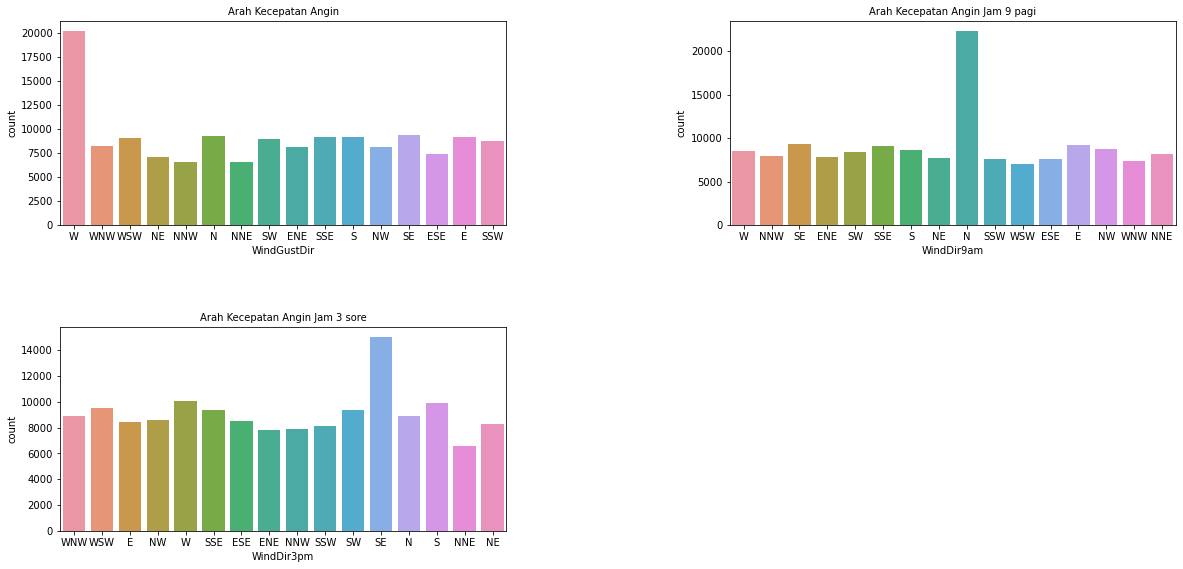

In [26]:
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(3,2,1)
sns.countplot(df['WindGustDir'])
ax.set_title("Arah Kecepatan Angin", fontsize=10)

ax = fig.add_subplot(3,2,2)
sns.countplot(df['WindDir9am'])
ax.set_title("Arah Kecepatan Angin Jam 9 pagi", fontsize=10)

ax = fig.add_subplot(3,2,3)
sns.countplot(df['WindDir3pm'])
ax.set_title("Arah Kecepatan Angin Jam 3 sore", fontsize=10)

plt.show()

Berdasarkan bar chart di atas dapat ditarik beberapa insight sebagai berikut: <br>
- arah kecepatan angin dari tahun 2007 hingga 2017 paling banyak mengarah ke arah barat (W) 
- arah kecepatan angin dari tahun 2007 hingga 2017 pada jam 9 pagi paling banyak mengarah ke arah utara (N)
- arah kecepatan angin dari tahun 2007 hingga 2017 pada jam 3 sore paling banyak mengarah ke arah tenggara (SE)

## Multiple Line Plot

### Temperature

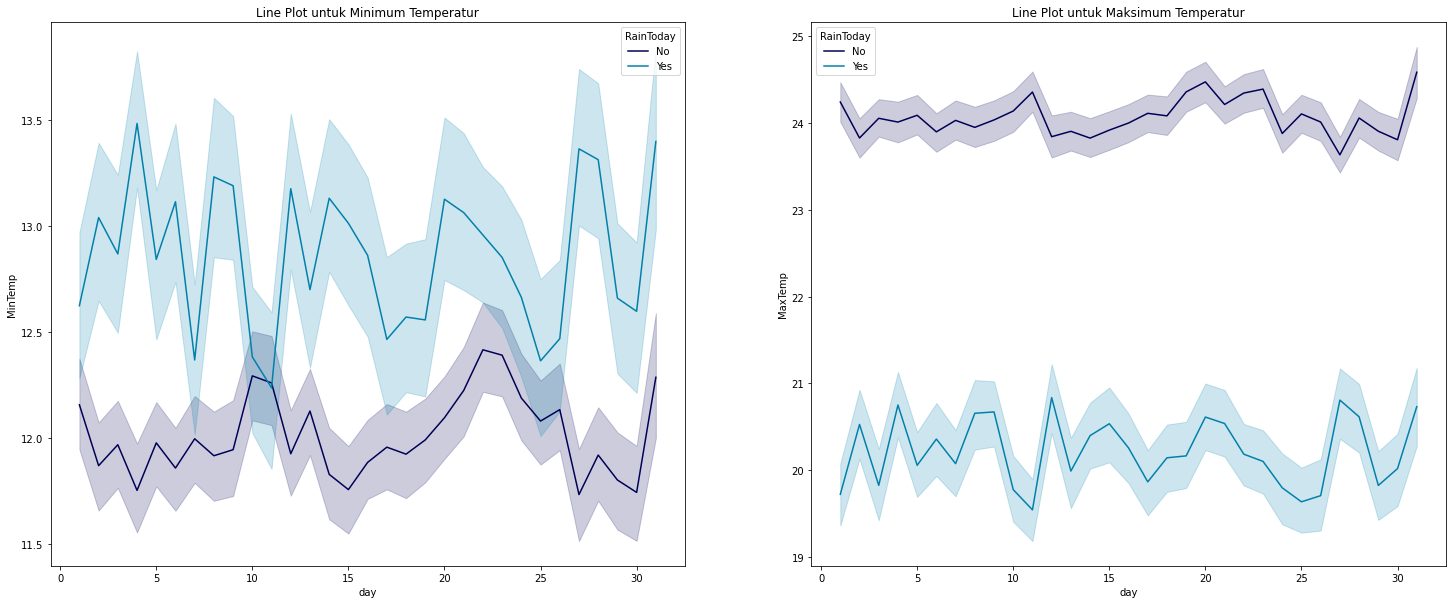

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Mintemp
sns.lineplot(ax=axes[0],x="day",y="MinTemp",hue="RainToday",data=df, palette='ocean')
axes[0].set_title('Line Plot untuk Minimum Temperatur')
# Maxtemp
sns.lineplot(ax=axes[1],x="day",y="MaxTemp",hue="RainToday",data=df, palette='ocean')
axes[1].set_title('Line Plot untuk Maksimum Temperatur')
plt.show()

Dari multiple line plot di atas dapat ditarik beberapa insight:
- minimal temperature lebih tinggi apabila hari itu hujan daripada tidak hujan.
- minimal temperature apabila hari itu hujan cenderung memiliki trend fluktuatif dari hari ke hari pada tahun 2007-2017. Minimal temperature tertinggi dari tahun 2007-2017 adalah pada tanggal 4. Sedangkan minimal temperature terendah ada pada tanggal 11.
- maximal temperature lebih tinggi apabila hari itu tidak hujan daripada hari itu hujan.
- maximal temperature apabila hari itu tidak hujan cenderung lebih stabil daripada maximal temperature apabila hari itu hujan

## Label Encoding

### Binary Data

In [28]:
label_encoder = preprocessing.LabelEncoder()

In [29]:
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

### Categorical Data

- WindGustDir9am dan WindGustDir3pm tidak digunakan karena telah terwakili oleh WindGustDir
- Location tidak digunakan karena tidak berhubungan untuk memprediksi hujan

In [30]:
categorical = df[['WindGustDir']]

In [31]:

for catcol in categorical:
    dummies = pd.get_dummies(df[catcol], prefix=catcol, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([catcol], axis = 1)


In [32]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,44.0,W,WNW,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,44.0,NNW,WSW,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,46.0,W,WSW,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,24.0,SE,E,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,41.0,ENE,NW,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,31.0,SE,ENE,...,0,0,0,0,0,0,0,0,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,22.0,SE,N,...,1,0,0,0,0,0,0,0,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,37.0,SE,WNW,...,0,0,0,0,0,0,0,0,0,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,4.8,8.4,28.0,SSE,N,...,0,0,0,1,0,0,0,0,0,0


# Data Pre-Processing

In [33]:
df.drop(['Date','month','month','year','WindDir9am','WindDir3pm','Location','day'], axis=1, inplace=True)

## Split Data

Kami melakukan training data dengan proporsi sebesar 25% untuk testing data dan 75% untuk training data

In [34]:
train, test = train_test_split(df, test_size=0.25, random_state=42)
train_index = train.index
test_index = test.index

In [35]:
y_train = train[['RainTomorrow']]
X_train = train.drop(['RainTomorrow'], axis=1)

In [36]:
y_test = test[['RainTomorrow']]
X_test = test.drop(['RainTomorrow'], axis=1)

In [37]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
100721,15.0,18.9,4.2,6.6,8.0,54.0,24.0,31.0,73.0,64.0,...,1,0,0,0,0,0,0,0,0,0
30234,13.1,26.8,0.0,4.6,10.9,39.0,22.0,15.0,61.0,22.0,...,0,0,0,0,0,0,0,1,0,0
68427,19.0,29.0,0.0,11.0,5.6,59.0,39.0,22.0,50.0,38.0,...,0,0,0,0,0,0,0,0,0,0
28624,18.1,32.2,0.0,2.1,8.4,30.0,0.0,17.0,99.0,51.0,...,0,0,0,0,0,0,0,0,0,0
31173,13.9,19.6,14.0,1.2,5.4,50.0,17.0,22.0,90.0,64.0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
X_test.columns.to_list()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW']

##  Scale Data

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

## Modelling

In [41]:
akurasi_training = []
akurasi_testing = []

### Logistic Regression

In [42]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [43]:
model.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [44]:
print(model.intercept_)
print(model.coef_)

[-1.85356112]
[[ 0.02380677 -0.2402834   0.07147187 -0.01748664 -0.28531695  0.65007596
  -0.10121235 -0.19109841  0.04816086  1.09798727  0.74877385 -1.12396459
   0.01451199  0.28162396  0.0996393   0.19352926  0.23144688  0.00174245
   0.00285188  0.0728634  -0.00866116  0.02075121  0.07185626  0.08303766
   0.01845152  0.02283278  0.0182467   0.02790596  0.06165178  0.07538124
   0.07518819  0.04406423]]


#### Evaluate the Model

In [45]:
model.predict_proba(X_train)

array([[0.32664288, 0.67335712],
       [0.33079161, 0.66920839],
       [0.90977875, 0.09022125],
       ...,
       [0.9720036 , 0.0279964 ],
       [0.12610807, 0.87389193],
       [0.97673812, 0.02326188]])

In [46]:
model.predict(X_train)

array([1, 1, 0, ..., 0, 1, 0])

#### Training Data

In [47]:
print('Accuracy:',model.score(X_train,y_train))

Accuracy: 0.8435583665612539


In [48]:
akurasi_training.append(model.score(X_train,y_train))

In [49]:
confusion_matrix(y_train, model.predict(X_train))

array([[80685,  4571],
       [12496, 11343]], dtype=int64)

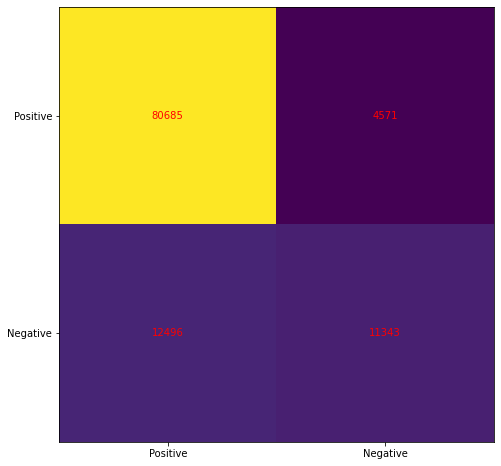

In [50]:
confusion_matrix(y_train, model.predict(X_train))
cm = confusion_matrix(y_train, model.predict(X_train))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive lebih banyak dari False Positive. Akan tetapi untuk True Negative masih lebih sedikit daripada False Negative. 

#### Testing Data

In [51]:
print('Accuracy:',model.score(X_test,y_test))

Accuracy: 0.843723360373986


In [52]:
akurasi_testing.append(model.score(X_test,y_test))

In [53]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28327
           1       0.72      0.47      0.57      8038

    accuracy                           0.84     36365
   macro avg       0.79      0.71      0.74     36365
weighted avg       0.83      0.84      0.83     36365



In [54]:
confusion_matrix(y_test, model.predict(X_test))

array([[26886,  1441],
       [ 4242,  3796]], dtype=int64)

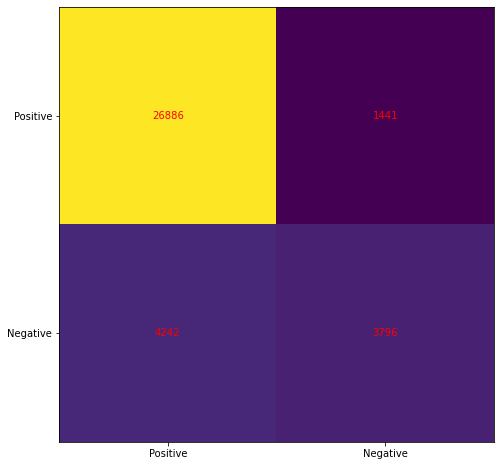

In [55]:
confusion_matrix(y_test, model.predict(X_test))
cm = confusion_matrix(y_test, model.predict(X_test))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive lebih banyak dari False Positive. Akan tetapi untuk True Negative masih lebih sedikit daripada False Negative. 

### Comparison between Testing and Training for Logistic Regression

In [56]:
compared = pd.DataFrame({'Keterangan':['Training Data','Testing Data'],'Accuracy':[model.score(X_train,y_train), model.score(X_test, y_test)]})
compared

,Keterangan,Accuracy
0,Training Data,0.843558
1,Testing Data,0.843723


Berdasarkan perbandingan di atas dapat dikatakan bahwa model Logistic Regression yang diimplementasikan pada kasus prediksi hujan di Australia tergolong underfitting karena akurasi training data lebih kecil daripada tresting data meskipun selisihnya tidak signifikan.

### SVM

In [57]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

LinearSVC()

### Evaluate the Model

#### Testing Data

In [58]:
y_pred2 =lsvc.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8425684036848619


In [59]:
akurasi_testing.append(metrics.accuracy_score(y_test, y_pred2))

In [60]:
confusion_matrix(y_test, lsvc.predict(X_test))

array([[27023,  1304],
       [ 4421,  3617]], dtype=int64)

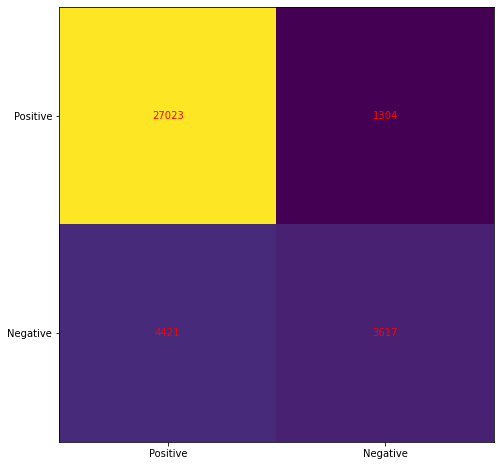

In [61]:
confusion_matrix(y_test, lsvc.predict(X_test))
cm = confusion_matrix(y_test, lsvc.predict(X_test))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive lebih banyak dari False Positive. Akan tetapi untuk True Negative masih lebih sedikit daripada False Negative.


In [62]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28327
           1       0.74      0.45      0.56      8038

    accuracy                           0.84     36365
   macro avg       0.80      0.70      0.73     36365
weighted avg       0.83      0.84      0.83     36365



#### Training Data

In [63]:
y_pred3 =lsvc.predict(X_train)
print('Accuracy:', metrics.accuracy_score(y_train, y_pred3))

Accuracy: 0.8431550483523534


In [64]:
akurasi_training.append(metrics.accuracy_score(y_train, y_pred3))

In [65]:
confusion_matrix(y_train, lsvc.predict(X_train))

array([[81166,  4090],
       [13021, 10818]], dtype=int64)

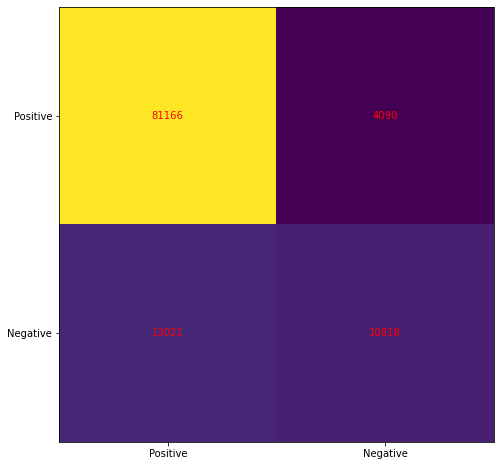

In [66]:
confusion_matrix(y_train, lsvc.predict(X_train))
cm = confusion_matrix(y_train, lsvc.predict(X_train))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive lebih banyak dari False Positive. Akan tetapi untuk True Negative masih lebih sedikit daripada False Negative.


In [67]:
print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     85256
           1       0.73      0.45      0.56     23839

    accuracy                           0.84    109095
   macro avg       0.79      0.70      0.73    109095
weighted avg       0.83      0.84      0.83    109095



### Comparison between Testing and Training for SVM

In [68]:
compared2 = pd.DataFrame({'Keterangan':['Training Data','Testing Data'],'Accuracy':[metrics.accuracy_score(y_train, y_pred3), metrics.accuracy_score(y_test, y_pred2)]})
compared2

,Keterangan,Accuracy
0,Training Data,0.843155
1,Testing Data,0.842568


In [69]:
if metrics.accuracy_score(y_train, y_pred3) < metrics.accuracy_score(y_test, y_pred2):
    print('Berdasarkan perbandingan di atas dapat dikatakan bahwa model SVM tergolong underfitting karena akurasi dari training lebih kecil daripada testing')
else:
    print('Berdasarkan perbandingan di atas dapat dikatakan bahwa model SVM tergolong overfitting karena akurasi dari training lebih besar daripada testing')

Berdasarkan perbandingan di atas dapat dikatakan bahwa model SVM tergolong overfitting karena akurasi dari training lebih besar daripada testing


# Comparison Between the Model

## Training Data

In [70]:
models = ['Logistic Regression', 'SVM']
akurasi_skor_training = {'Metode':models, 'Akurasi':akurasi_training}
akurasi_skor_training = pd.DataFrame(akurasi_skor_training)

In [71]:
akurasi_skor_training

,Metode,Akurasi
0,Logistic Regression,0.843558
1,SVM,0.843155


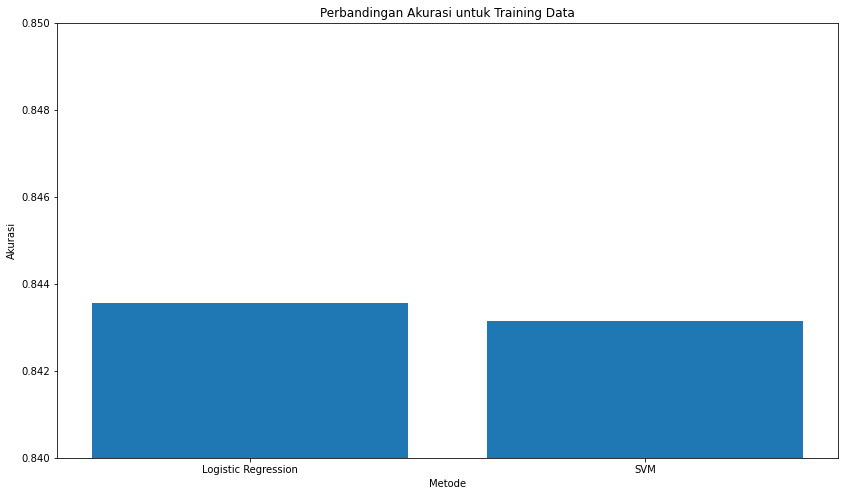

In [72]:
plt.subplots(figsize=(14, 8))
plt.bar(akurasi_skor_training['Metode'], akurasi_skor_training['Akurasi'])
plt.ylim(0.84, 0.85)
plt.title("Perbandingan Akurasi untuk Training Data")
plt.ylabel("Akurasi")
plt.xlabel("Metode")
plt.show()

In [73]:
if akurasi_training[0] < akurasi_training[1]:
    print('SVM memiliki akurasi yang lebih tinggi untuk training data')
else:
    print('logistic regression memiliki akurasi yang lebih tinggi untuk training data')

logistic regression memiliki akurasi yang lebih tinggi untuk training data


## Testing Data

In [74]:
models = ['Logistic Regression', 'SVM']
akurasi_skor_testing = {'Metode':models, 'Akurasi':akurasi_testing}
akurasi_skor_testing = pd.DataFrame(akurasi_skor_testing)

In [75]:
akurasi_skor_testing

,Metode,Akurasi
0,Logistic Regression,0.843723
1,SVM,0.842568


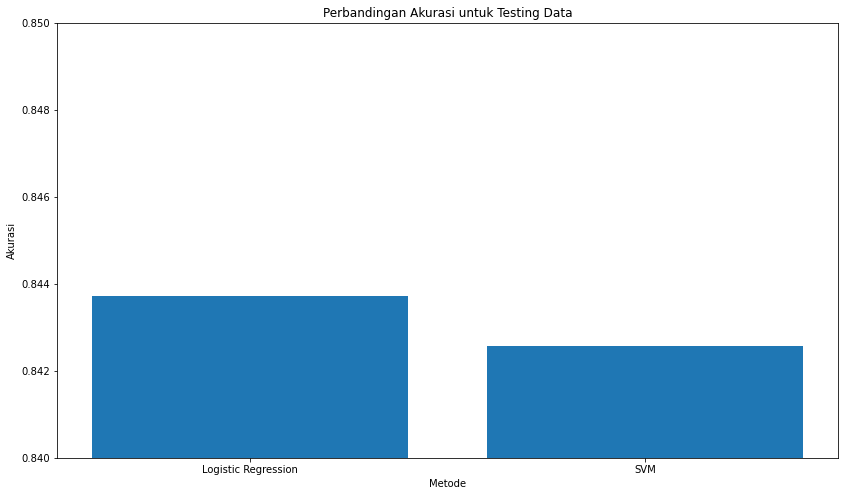

In [76]:
plt.subplots(figsize=(14, 8))
plt.bar(akurasi_skor_testing['Metode'], akurasi_skor_testing['Akurasi'])
plt.ylim(0.84, 0.85)
plt.title("Perbandingan Akurasi untuk Testing Data")
plt.ylabel("Akurasi")
plt.xlabel("Metode")
plt.show()

In [77]:
if akurasi_testing[0] < akurasi_testing[1]:
    print('SVM memiliki akurasi yang lebih tinggi untuk testing data')
else:
    print('logistic regression memiliki akurasi yang lebih tinggi untuk testing data')

logistic regression memiliki akurasi yang lebih tinggi untuk testing data


# Conclusion

Dari analisis ini dapat diambil kesimpulan bahwa: <br>
1. Pada tahun 2007-2017 persentase hari esok akan hujan lebih kecil daripada hari esok tidak akan hujan.
2. Rata-rata curah hujan tertinggi berada pada tahun 2007, sedangkan curah hujan terendah berada pada tahun 2014
3. Pada bulan Desember hingga Februari matahari bersinar cukup lama dikarenakan pada bulan tersebut Australia memasuki musim panas. Sementara itu, pada bulan Juni hingga Juli lama matahari bersinar tidak begitu panjang karena pada bulan tersebut Australia mengalami musim dingin.
4. Kecepatan angin di jam 3 sore dan 9 pagi tidak berdistribusi normal. Rata-rata kecepatan angin di jam 3 sore lebih tinggi daripada rata-rata kecepatan angin di jam 9 pagi.
5. Arah kecepatan angin dari tahun 2007 hingga 2017 paling banyak mengarah ke arah barat (W).
6. Minimal temperature apabila hari itu hujan cenderung memiliki trend fluktuatif dari hari ke hari pada tahun 2007-2017. Minimal temperature tertinggi dari tahun 2007-2017 adalah pada tanggal 4. Sedangkan minimal temperature terendah ada pada tanggal 11.
7. Maximal temperature apabila hari itu tidak hujan cenderung lebih stabil daripada maximal temperature apabila hari itu hujan.
8. Logistic Regression memiliki akurasi yang lebih tinggi daripada SVM untuk data training dalam memprediksi hujan di Australia. Oleh karena itu, dapat dikatakan bahwa model tebaik dalam kasus ini adalah Logistic Regression.


# Deployment

In [78]:
#simpan object
#wb: write binary
import pickle

with open("scaler.pkl", "wb")  as f:
    pickle.dump(scaler, f)

In [79]:
with open("lr.pkl", "wb") as f:
    pickle.dump(model,f)

In [80]:
# buat pipeline
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='liblinear')
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [81]:
with open("pipeline.pkl","wb") as f:
    pickle.dump(pipe,f)

In [82]:
y_pred = pipe.predict(X_test)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28327
           1       0.72      0.47      0.57      8038

    accuracy                           0.84     36365
   macro avg       0.79      0.71      0.74     36365
weighted avg       0.83      0.84      0.83     36365

